# Initial plotting of the SIR curve

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
#data = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]

In [3]:
df=pd.read_csv('Data_COVID.csv')
len(list(df['Date']))

71

In [4]:
data=list(df['Cumulative total no of cases'])
#data

In [60]:
def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

/home/arkadeep/.local/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


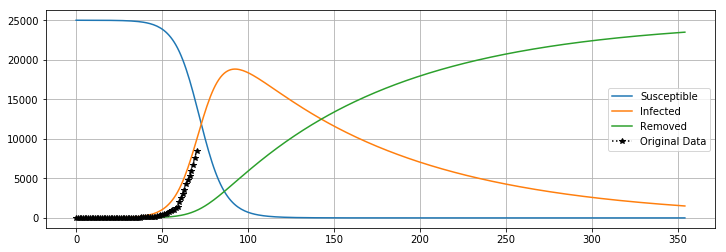

In [61]:
beta,gamma = [0.000006,0.01]
day_count=len(list(df['Date']))
S_0=25000
I_0=1
R_0=0



sol = solve_ivp(SIR,[0,5*day_count],[S_0,I_0,R_0],t_eval=np.arange(0,5*day_count,1))

fig = plt.figure(figsize=(12,4))
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
plt.plot(np.arange(0,day_count),data,"k*:")
plt.grid("True")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

# Fitting the curve to the data

In [62]:
day_count=len(list(df['Date']))
S_0=25000
I_0=1
R_0=0



#sol = solve_ivp(SIR,[0,5*day_count],[S_0,I_0,R_0],t_eval=np.arange(0,5*day_count,1))

def sumsq(p):
    beta, gamma = p
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    #sol = solve_ivp(SIR,[0,14],[762,1,0],t_eval=np.arange(0,14.2,0.2))
    sol = solve_ivp(SIR,[0,5*day_count],[S_0,I_0,R_0],t_eval=np.arange(0,5*day_count,1))
    return(sum((sol.y[1][::5]-data)**2))

In [63]:
from scipy.optimize import minimize

msol = minimize(sumsq,[0.000006,0.01],method='Nelder-Mead')
msol.x

array([ 7.68916694e-09, -2.56712597e-02])

In [64]:
beta,gamma = msol.x
def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

In [65]:
#sol = solve_ivp(SIR,[0,14],[762,1,0],t_eval=np.arange(0,14.2,0.2))
sol = solve_ivp(SIR,[0,5*day_count],[S_0,I_0,R_0],t_eval=np.arange(0,5*day_count,1))

'fig = plt.figure(figsize=(12,4))\nplt.plot(sol.t,sol.y[0])\nplt.plot(sol.t,sol.y[1])\nplt.plot(sol.t,sol.y[2])\nplt.plot(np.arange(0,day_count),data,"k*:")\nplt.grid("True")\nplt.legend(["Susceptible","Infected","Removed","Original Data"])'

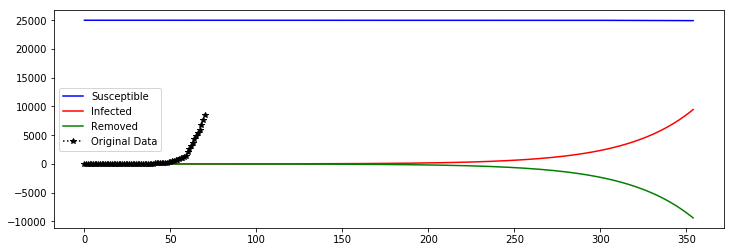

In [66]:
fig = plt.figure(figsize=(12,4))
plt.plot(sol.t,sol.y[0],"b-")
plt.plot(sol.t,sol.y[1],"r-")
plt.plot(sol.t,sol.y[2],"g-")
plt.plot(np.arange(0,day_count),data,"k*:")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

"""fig = plt.figure(figsize=(12,4))
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
plt.plot(np.arange(0,day_count),data,"k*:")
plt.grid("True")
plt.legend(["Susceptible","Infected","Removed","Original Data"])"""